<a href="https://colab.research.google.com/github/gskumlehn/autism-info-llm-comparison/blob/main/count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/gskumlehn/autism-info-llm-comparison.git

Cloning into 'autism-info-llm-comparison'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 57 (delta 22), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (57/57), 3.57 MiB | 10.46 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
import pandas as pd

df = pd.read_csv("autism-info-llm-comparison/data.csv")
df.head()

,Questions,WHO,ChatGPT 4.0,ChatGPT Vision,ScholarGPT,Gemini,Llama3,Bing AI (Copilot),Google Palm,Claude,ReKa Core,Solar Mini
0,What is autism spectrum disorders?,Autism spectrum disorders (ASD) are a diverse ...,Autism Spectrum Disorders (ASD) are a group of...,Autism Spectrum Disorders (ASD) are a group of...,Autism Spectrum Disorders (ASD) are a group of...,Autism spectrum disorder (ASD) is a developmen...,Autism Spectrum Disorders (ASD) is a neurodeve...,Autism Spectrum Disorders (ASD) are a group of...,Autism spectrum disorders (ASD) are a group of...,Autism Spectrum Disorder (ASD) is a complex ne...,Autism Spectrum Disorder (ASD) is a neurodevel...,Autism spectrum disorder (ASD) is a neurodevel...
1,Which are the abilities and need of individual...,The abilities and needs of autistic people var...,Individuals with autism spectrum disorders (AS...,Abilities:\n\nStrong attention to detail and p...,Abilities of Individuals with Autism Spectrum ...,Autism spectrum disorder (ASD) is a developmen...,Individuals with Autism Spectrum Disorders (AS...,Individuals with Autism Spectrum Disorders (AS...,Individuals with autism spectrum disorders (AS...,Individuals with autism spectrum disorders (AS...,Abilities of Individuals with Autism Spectrum ...,Individuals with autism spectrum disorders oft...
2,Which are the co-occurring conditions of autis...,People with autism often have co-occurring con...,Common co-occurring conditions in individuals ...,Common co-occurring conditions with Autism Spe...,Individuals with Autism Spectrum Disorders (AS...,People with autism spectrum disorder (ASD) oft...,Common co-occurring conditions with Autism Spe...,Individuals with Autism Spectrum Disorders (AS...,Individuals with autism spectrum disorders (AS...,Co-occurring conditions frequently associated ...,Individuals with Autism Spectrum Disorders (AS...,Individuals with autism spectrum disorders can...
3,What is the epidemiology of autism spectrum di...,It is estimated that worldwide about 1 in 100 ...,The epidemiology of autism spectrum disorders ...,The epidemiology of Autism Spectrum Disorders ...,The epidemiology of Autism Spectrum Disorders ...,The epidemiology of autism spectrum disorder (...,The epidemiology of Autism Spectrum Disorders ...,What is the epidemiology of autism spectrum di...,The epidemiology of autism spectrum disorders ...,Here's a concise overview of the epidemiology ...,Epidemiology of Autism Spectrum Disorders (ASD...,The epidemiology of autism spectrum disorders ...
4,What are the causes of autism spectrum disorders?,Available scientific evidence suggests that th...,The causes of autism spectrum disorders (ASD) ...,The causes of Autism Spectrum Disorders (ASD) ...,The exact causes of Autism Spectrum Disorders ...,The exact cause of autism spectrum disorder (A...,The exact causes of Autism Spectrum Disorders ...,The exact causes of Autism Spectrum Disorders ...,The exact causes of autism spectrum disorders ...,The causes of autism spectrum disorders (ASD) ...,The causes of Autism Spectrum Disorders (ASD) ...,The exact causes of autism spectrum disorders ...


In [3]:
answers = df.iloc[:, 1:]
answers.head()

,WHO,ChatGPT 4.0,ChatGPT Vision,ScholarGPT,Gemini,Llama3,Bing AI (Copilot),Google Palm,Claude,ReKa Core,Solar Mini
0,Autism spectrum disorders (ASD) are a diverse ...,Autism Spectrum Disorders (ASD) are a group of...,Autism Spectrum Disorders (ASD) are a group of...,Autism Spectrum Disorders (ASD) are a group of...,Autism spectrum disorder (ASD) is a developmen...,Autism Spectrum Disorders (ASD) is a neurodeve...,Autism Spectrum Disorders (ASD) are a group of...,Autism spectrum disorders (ASD) are a group of...,Autism Spectrum Disorder (ASD) is a complex ne...,Autism Spectrum Disorder (ASD) is a neurodevel...,Autism spectrum disorder (ASD) is a neurodevel...
1,The abilities and needs of autistic people var...,Individuals with autism spectrum disorders (AS...,Abilities:\n\nStrong attention to detail and p...,Abilities of Individuals with Autism Spectrum ...,Autism spectrum disorder (ASD) is a developmen...,Individuals with Autism Spectrum Disorders (AS...,Individuals with Autism Spectrum Disorders (AS...,Individuals with autism spectrum disorders (AS...,Individuals with autism spectrum disorders (AS...,Abilities of Individuals with Autism Spectrum ...,Individuals with autism spectrum disorders oft...
2,People with autism often have co-occurring con...,Common co-occurring conditions in individuals ...,Common co-occurring conditions with Autism Spe...,Individuals with Autism Spectrum Disorders (AS...,People with autism spectrum disorder (ASD) oft...,Common co-occurring conditions with Autism Spe...,Individuals with Autism Spectrum Disorders (AS...,Individuals with autism spectrum disorders (AS...,Co-occurring conditions frequently associated ...,Individuals with Autism Spectrum Disorders (AS...,Individuals with autism spectrum disorders can...
3,It is estimated that worldwide about 1 in 100 ...,The epidemiology of autism spectrum disorders ...,The epidemiology of Autism Spectrum Disorders ...,The epidemiology of Autism Spectrum Disorders ...,The epidemiology of autism spectrum disorder (...,The epidemiology of Autism Spectrum Disorders ...,What is the epidemiology of autism spectrum di...,The epidemiology of autism spectrum disorders ...,Here's a concise overview of the epidemiology ...,Epidemiology of Autism Spectrum Disorders (ASD...,The epidemiology of autism spectrum disorders ...
4,Available scientific evidence suggests that th...,The causes of autism spectrum disorders (ASD) ...,The causes of Autism Spectrum Disorders (ASD) ...,The exact causes of Autism Spectrum Disorders ...,The exact cause of autism spectrum disorder (A...,The exact causes of Autism Spectrum Disorders ...,The exact causes of Autism Spectrum Disorders ...,The exact causes of autism spectrum disorders ...,The causes of autism spectrum disorders (ASD) ...,The causes of Autism Spectrum Disorders (ASD) ...,The exact causes of autism spectrum disorders ...


In [4]:
def word_count(text):
    return len(text.split())

word_count_df = answers.map(word_count)

word_count_question_means = word_count_df.mean(axis=1)

word_count_df["Mean"] = word_count_question_means

print(word_count_df)

   WHO  ChatGPT 4.0  ChatGPT Vision  ScholarGPT  Gemini  Llama3  \
0   51           35              46          60      37      38   
1   97          102              67         152      37      37   
2   44           89              59         126     252      36   
3   49          120             116         163     210      45   
4  124          101             123         189     171      59   
5  180          167             177         222     310      71   
6  176          216             266         294     153      66   
7   54          222             266         263     102      63   

   Bing AI (Copilot)  Google Palm  Claude  ReKa Core  Solar Mini        Mean  
0                 60           61      80        106          54   57.090909  
1                157          110     116        255         197  120.636364  
2                137           74      97        192          61  106.090909  
3                 81          235     148        317          84  142.545455  
4

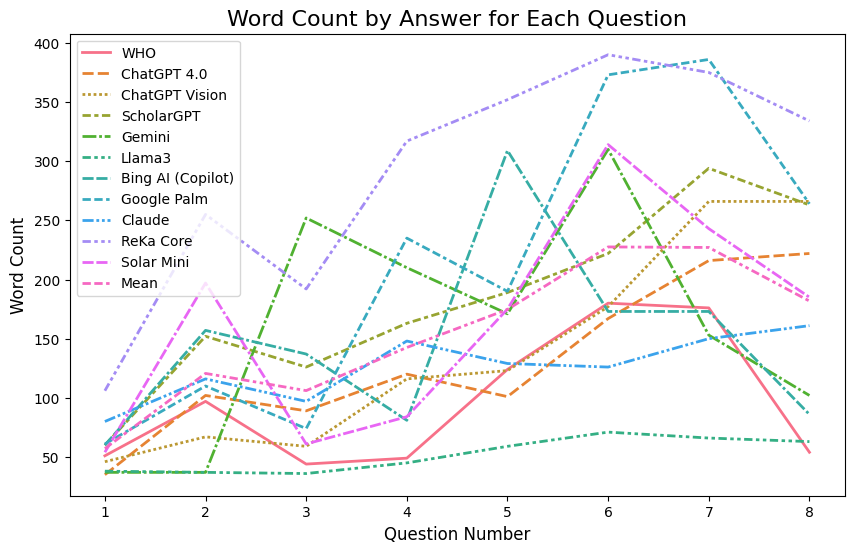

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(10, 6))

sns.set_palette("crest")
sns.lineplot(data=word_count_df, linewidth=2)

plt.title("Word Count by Answer for Each Question", fontsize=16)
plt.xlabel("Question Number", fontsize=12)
plt.ylabel("Word Count", fontsize=12)
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)])

plt.show()

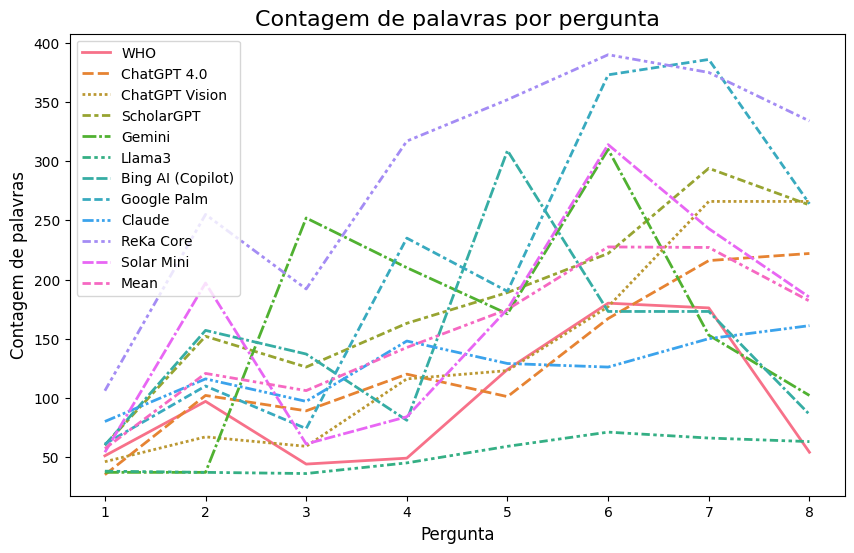

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(10, 6))

sns.set_palette("crest")
sns.lineplot(data=word_count_df, linewidth=2)

plt.title("Contagem de palavras por pergunta", fontsize=16)
plt.xlabel("Pergunta", fontsize=12)
plt.ylabel("Contagem de palavras", fontsize=12)
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)])

plt.show()

In [7]:
means = word_count_df.mean()
print(means)

WHO                   96.875000
ChatGPT 4.0          131.500000
ChatGPT Vision       140.000000
ScholarGPT           183.625000
Gemini               159.000000
Llama3                51.875000
Bing AI (Copilot)    147.000000
Google Palm          211.625000
Claude               125.875000
ReKa Core            290.125000
Solar Mini           164.125000
Mean                 154.693182
dtype: float64


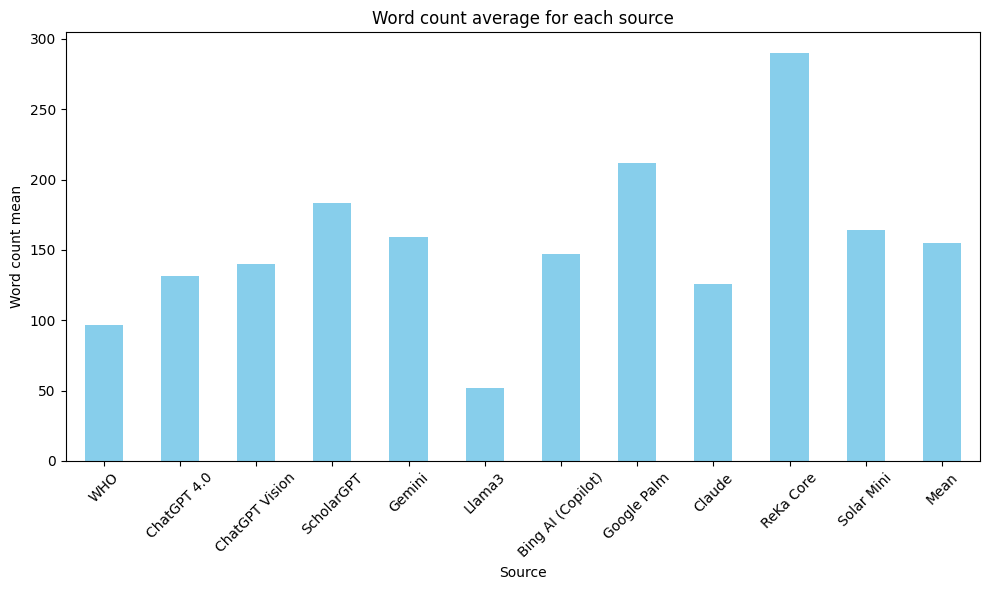

In [8]:
plt.figure(figsize=(10, 6))
means.plot(kind='bar', color='skyblue')
plt.title('Word count average for each source')
plt.xlabel('Source')
plt.ylabel('Word count mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

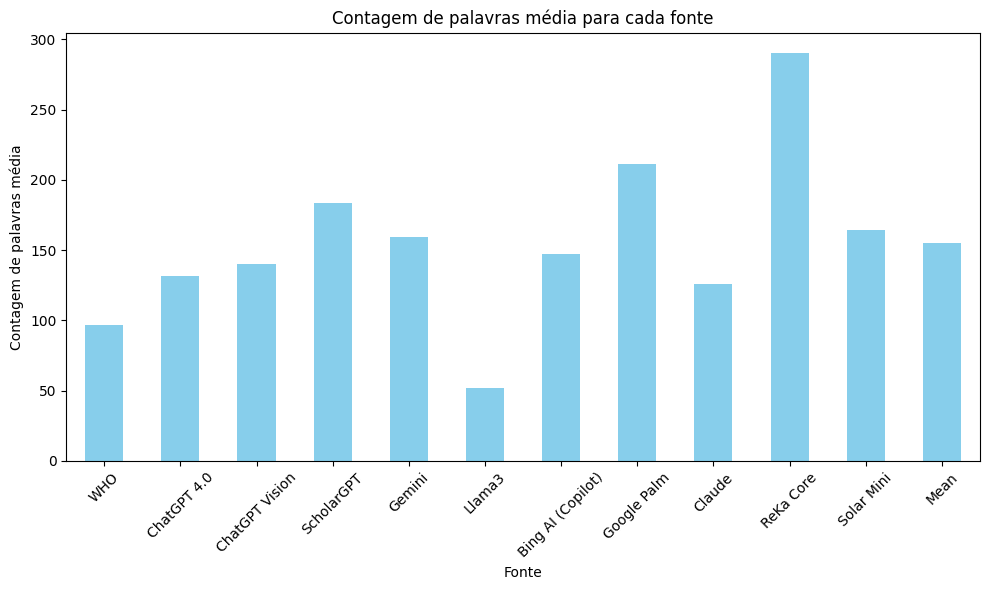

In [9]:
plt.figure(figsize=(10, 6))
means.plot(kind='bar', color='skyblue')
plt.title('Contagem de palavras média para cada fonte')
plt.xlabel('Fonte')
plt.ylabel('Contagem de palavras média')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

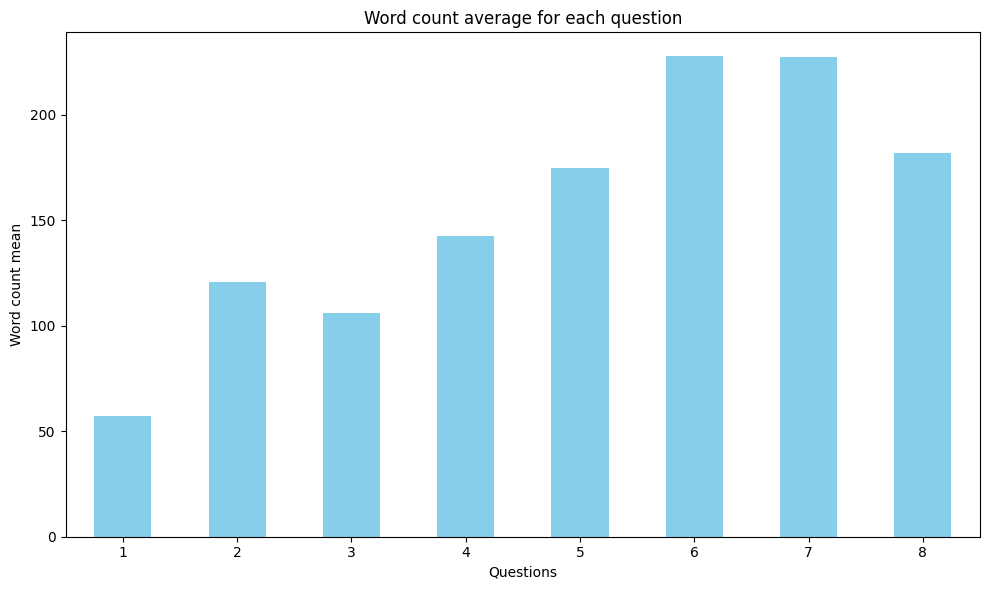

In [10]:
plt.figure(figsize=(10, 6))
word_count_question_means.plot(kind='bar', color='skyblue')
plt.title('Word count average for each question')
plt.xlabel('Questions')
plt.ylabel('Word count mean')
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)], rotation=0)
plt.tight_layout()
plt.show()

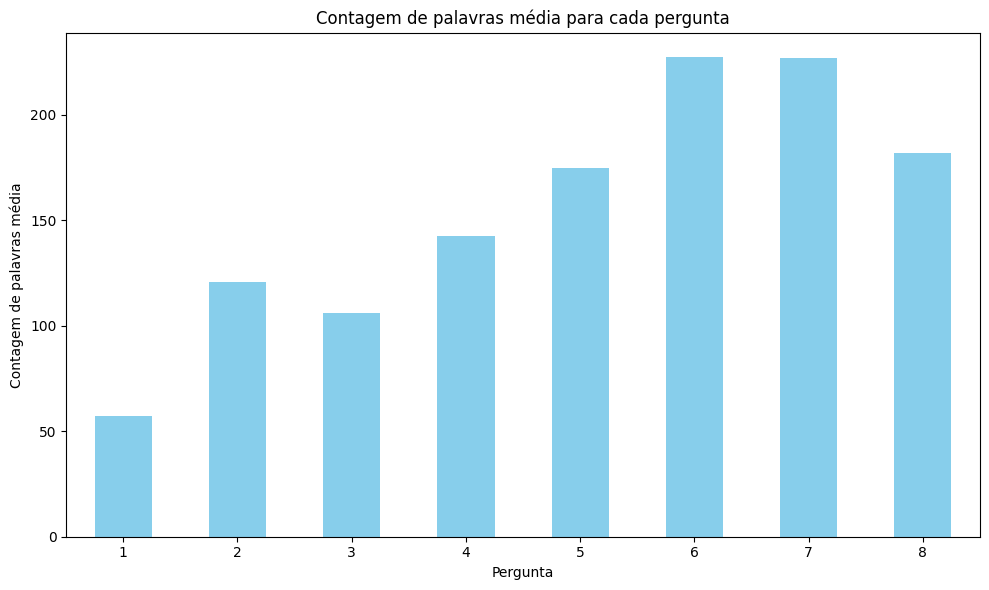

In [11]:
plt.figure(figsize=(10, 6))
word_count_question_means.plot(kind='bar', color='skyblue')
plt.title('Contagem de palavras média para cada pergunta')
plt.xlabel('Pergunta')
plt.ylabel('Contagem de palavras média')
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)], rotation=0)
plt.tight_layout()
plt.show()

In [12]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def token_count(text):
    return len(word_tokenize(text))

token_count_df = answers.map(token_count)

token_count_question_means = token_count_df.mean(axis=1)

token_count_df["Mean"] = token_count_question_means


print(token_count_df)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


   WHO  ChatGPT 4.0  ChatGPT Vision  ScholarGPT  Gemini  Llama3  \
0   58           42              57          70      45      46   
1  106          127              87         189      45      42   
2   50          115              89         163     306      49   
3   58          145             148         197     248      50   
4  134          126             157         236     205      74   
5  205          227             246         298     380     102   
6  198          273             327         355     175      70   
7   58          267             317         313     113      74   

   Bing AI (Copilot)  Google Palm  Claude  ReKa Core  Solar Mini        Mean  
0                 70           70      99        121          65   67.545455  
1                192          121     128        306         230  143.000000  
2                178           85     111        250          70  133.272727  
3                 96          274     166        364          94  167.272727  
4

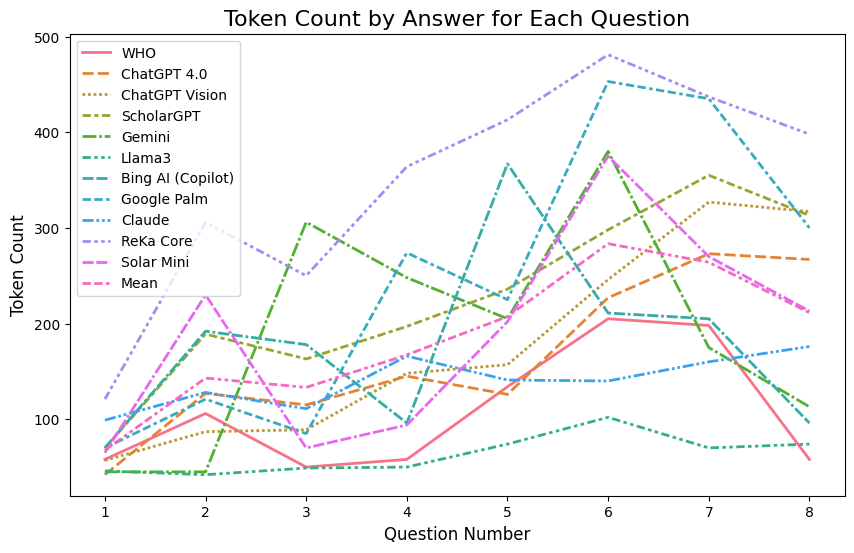

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(10, 6))

sns.set_palette("crest")
sns.lineplot(data=token_count_df, linewidth=2)

plt.title("Token Count by Answer for Each Question", fontsize=16)
plt.xlabel("Question Number", fontsize=12)
plt.ylabel("Token Count", fontsize=12)
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)])

plt.show()

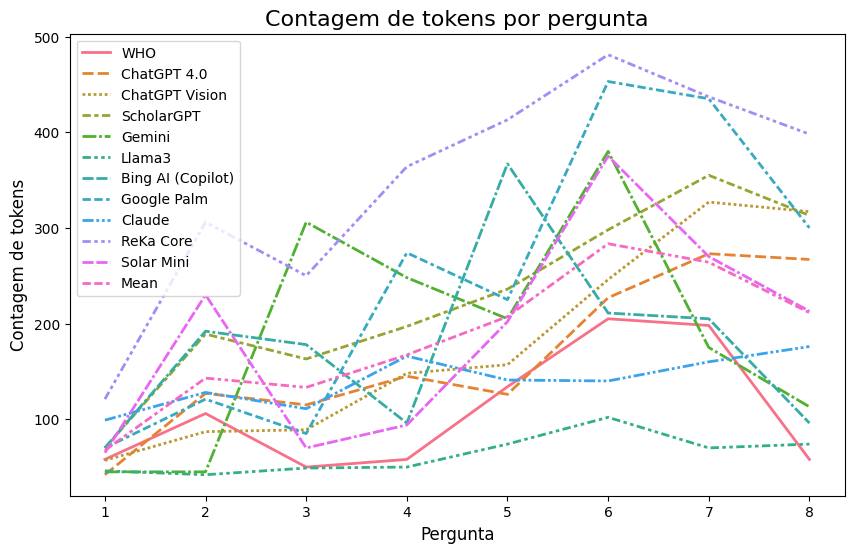

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(10, 6))

sns.set_palette("crest")
sns.lineplot(data=token_count_df, linewidth=2)

plt.title("Contagem de tokens por pergunta", fontsize=16)
plt.xlabel("Pergunta", fontsize=12)
plt.ylabel("Contagem de tokens", fontsize=12)
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)])

plt.show()

In [15]:
tokens_mean = token_count_df.mean()
print(tokens_mean)

WHO                  108.375000
ChatGPT 4.0          165.250000
ChatGPT Vision       178.500000
ScholarGPT           227.625000
Gemini               189.625000
Llama3                63.375000
Bing AI (Copilot)    176.875000
Google Palm          245.375000
Claude               140.125000
ReKa Core            346.250000
Solar Mini           189.875000
Mean                 184.659091
dtype: float64


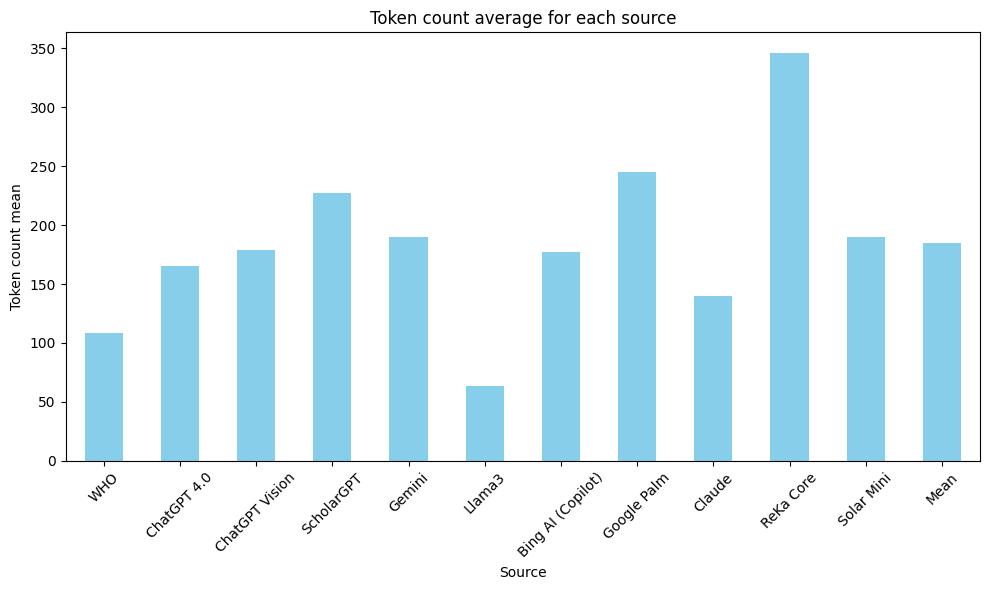

In [16]:
plt.figure(figsize=(10, 6))
tokens_mean.plot(kind='bar', color='skyblue')
plt.title('Token count average for each source')
plt.xlabel('Source')
plt.ylabel('Token count mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

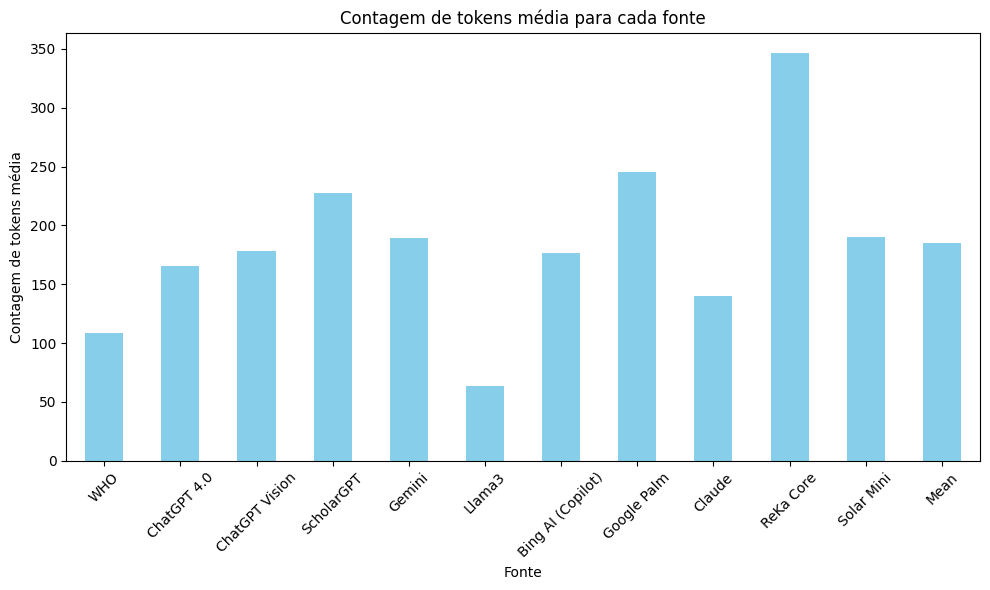

In [17]:
plt.figure(figsize=(10, 6))
tokens_mean.plot(kind='bar', color='skyblue')
plt.title('Contagem de tokens média para cada fonte')
plt.xlabel('Fonte')
plt.ylabel('Contagem de tokens média')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

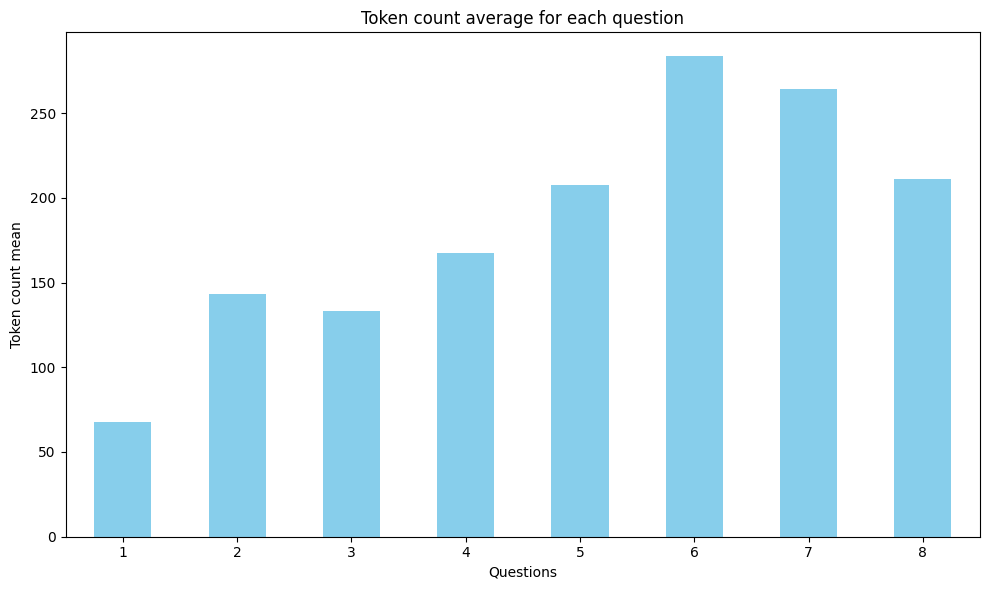

In [18]:
plt.figure(figsize=(10, 6))
token_count_question_means.plot(kind='bar', color='skyblue')
plt.title('Token count average for each question')
plt.xlabel('Questions')
plt.ylabel('Token count mean')
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)], rotation=0)
plt.tight_layout()
plt.show()

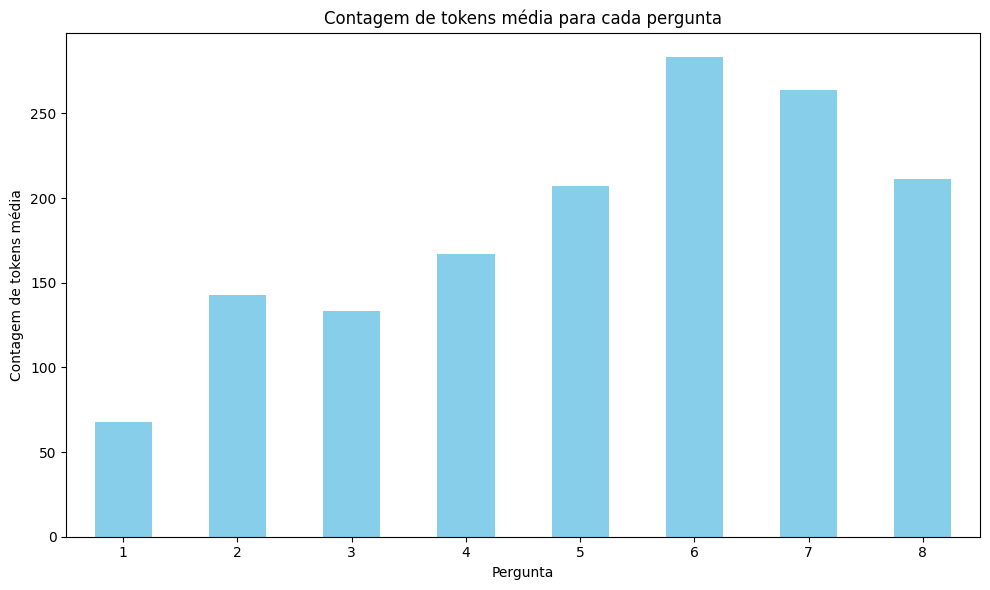

In [20]:
plt.figure(figsize=(10, 6))
token_count_question_means.plot(kind='bar', color='skyblue')
plt.title('Contagem de tokens média para cada pergunta')
plt.xlabel('Pergunta')
plt.ylabel('Contagem de tokens média')
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)], rotation=0)
plt.tight_layout()
plt.show()